**Imports**

In [1]:
import pydataset
import pyplotterlib.standard.plotters as ppl
import matplotlib.pyplot as plt #For saving images

**Process the data**

In [2]:
#Remove columns
DF = pydataset.data(item="Crime")
cols = ["crmrte", "prbarr", "prbconv", "prbpris", "avgsen", "polpc", "density"]
DF = DF[cols]

#Rename columns
_renameMap = {"crmrte":"Crime Rate", "prbarr":"P(Arrest)", "prbconv":"P(Conviction)",
              "prbpris":"P(Prison)", "avgsen":"Average Sentence", "polpc":"Police Per Capita",
              "density":"Population Density"}
DF.rename(_renameMap, axis=1, inplace=True)

**Calculate a correlation matrix**

In [3]:
groupLabels = DF.columns
corrMatrix = DF.corr().to_numpy()
DF.corr()

,Crime Rate,P(Arrest),P(Conviction),P(Prison),Average Sentence,Police Per Capita,Population Density
Crime Rate,1.000000,-0.358553,-0.113033,0.135537,0.032416,0.184826,0.694072
P(Arrest),-0.358553,1.000000,0.035569,-0.074893,0.034031,0.290581,-0.271228
P(Conviction),-0.113033,0.035569,1.000000,-0.037340,0.015305,0.449635,-0.115555
P(Prison),0.135537,-0.074893,-0.037340,1.000000,-0.004299,-0.057452,0.164663
Average Sentence,0.032416,0.034031,0.015305,-0.004299,1.000000,0.017130,0.078075
Police Per Capita,0.184826,0.290581,0.449635,-0.057452,0.017130,1.000000,-0.039696
Population Density,0.694072,-0.271228,-0.115555,0.164663,0.078075,-0.039696,1.000000


**Create a template for creating grids of plots (for later use)**

In [4]:
_currKwargs = {"figHeightPerRow":5, "figWidthPerCol":7, "nColsGrid":2, "constrainedLayout":True}
RECT_MULTI_PLOTTER = ppl.RectMultiPlotter(**_currKwargs)

**Create a plot to visualise the matrix**

In [5]:
_currKwargs = {"colorBarShow":True,
               "colorBarLabel":"Correlation", "colorBarLabelRotation":90,
               "colorMapMaxVal":1, "colorMapMinVal":-1,
               "fontSizeDefault":12,
              "groupLabels":groupLabels,"groupLabelsColsRotation":70,"plotData":corrMatrix}
firstPlotter = ppl.DiscreteHeatMapPlotter(**_currKwargs)

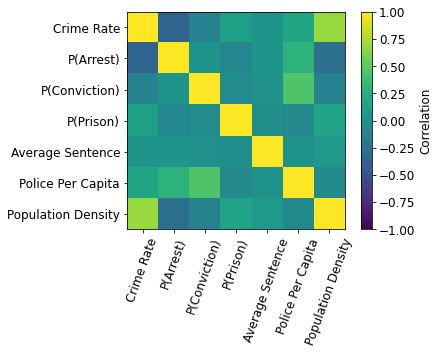

In [6]:
unused = firstPlotter.createPlot()

**Change a few options to emphasise areas of correlation**

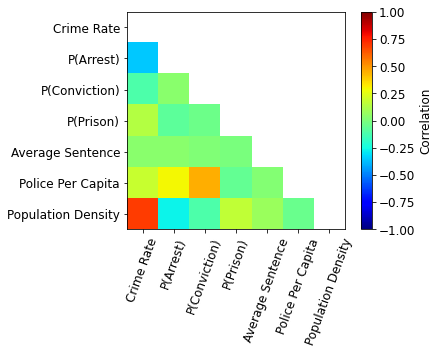

In [7]:
_currKwargs = {"plotDiag":False, "plotUpperTri":False,
               "colorMapStr":"jet"}
secondPlotter = firstPlotter.createFactory(**_currKwargs)
unused = secondPlotter.createPlot()

**Add annotations**

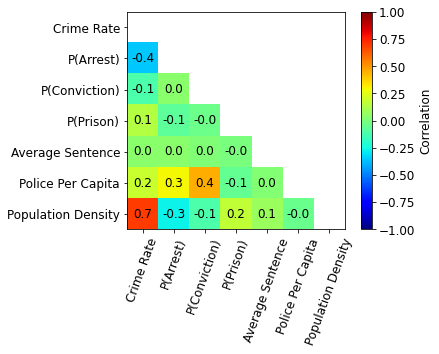

In [8]:
_currKwargs = {"annotateVals":True, "annotateValsStrFmt":"{:.1f}"}
thirdPlotter = secondPlotter.createFactory(**_currKwargs)
unused = thirdPlotter.createPlot()


**Demonstrate text color issues with annotations**

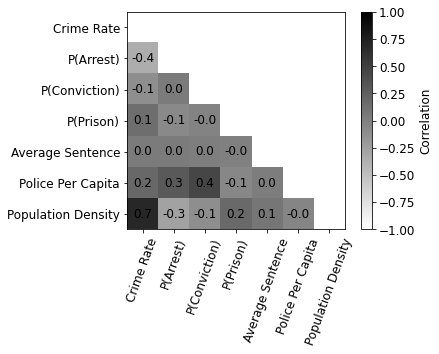

In [9]:
_currKwargs = {"colorMapStr":"binary"}
binaryPlotter = thirdPlotter.createFactory(**_currKwargs)
unused = binaryPlotter.createPlot(**_currKwargs)

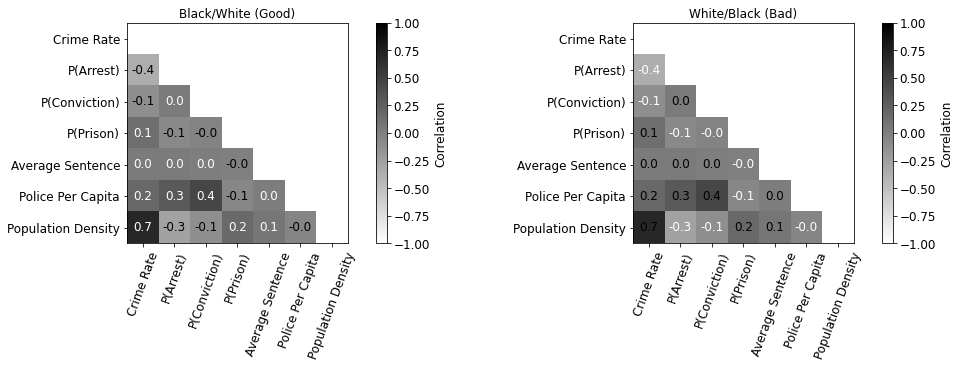

In [10]:
bwPlotter = binaryPlotter.createFactory(annotateValsTextColor=["black","white"], titleStr="Black/White (Good)")
wbPlotter = binaryPlotter.createFactory(annotateValsTextColor=["white","black"], titleStr="White/Black (Bad)")

unused = RECT_MULTI_PLOTTER.createPlot(plotters=[bwPlotter, wbPlotter])

**Combine various plots together and save**

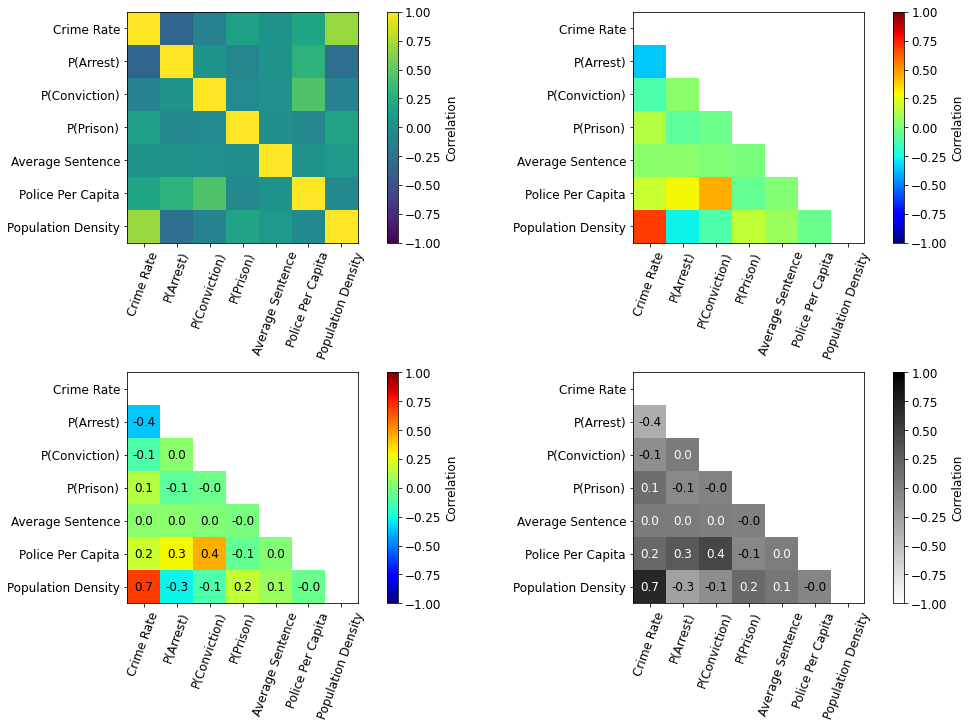

In [11]:
bwPlotter.opts.titleStr.value = None
_unused = RECT_MULTI_PLOTTER.createPlot(plotters=[firstPlotter, secondPlotter, thirdPlotter, bwPlotter], nColsGrid=2,
                                       constrainedLayout=True, figWidthPerCol=7)
plt.savefig("discrete_heatmap_plotter_imgA")